<p align="center">
<br> Universidade Federal de Alagoas Instituto de Computação</br>

</p>

# Trabalho Prático AB2

Disciplina: Sistemas Distribuídos

Semestre letivo: 2019.1

Professor: André Lage Freitas

## Especificação

**Importante**. Leia atentamente essa seção pois só serão aceitos trabalhos que obedecerem as a especificações a seguir. 

Baseado(a) no exemplo a seguir de implementação do B-multicast em Julia, façam os exercícios descritos nesse documento.

In [ ]:
# # Install libraries use in this work
using Pkg
Pkg.add("Distributed")
Pkg.add("Plots")
Pkg.add("StatsPlots")
Pkg.add("Statistics")

In [1]:
# Import libraries use in this work
using Distributed
using Plots
using StatsPlots
using Statistics

### B_multicast

### Exercício 1: Sincronismo (2,0 pontos)

Adicione 10 processos com o comando `addprocs` abaixo. 

_Atenção_ : sua instalação local de Julia pode não conseguir adicionar 10 processos, use a [JuliaBox](https://juliabox.com).

In [2]:
addprocs(10)
wrks = workers()

10-element Array{Int32,1}:
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11

In [16]:
@everywhere function B_multicast(workers,msg,func,sync)
    if sync
        for w in workers
            @sync @spawnat w func(msg)
        end
    else
        for w in workers
            @spawnat w func(msg)
        end
    end
end

Modifique a implementação do B-multicast para utilizar communicação síncrona.

Execute as duas versões do B-multicast (síncrona e assíncrona) e compare as saídas.

In [17]:
@everywhere function B_deliver(m)
    println(m)
end

In [18]:
B_multicast(wrks,"oi!",B_deliver, true)

      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      From worker 11:	oi!


In [19]:
B_multicast(wrks,"oi!",B_deliver, false)

A ordem das mensagens das saídas foram as mesmas para ambas versões do B-multicast? Por quê?

**Resposta**: _Não, como na implementação assíncrona, a linguaguem nem dar a certeza de que foi lançado o processo . Não se tem certeza da ordem e nem da execução, pois com testes feitos no terminal nem chegava a ter alguma saída(print) no terminal, enquanto na execução síncrona tinha todas as saídas(prints) e em ordem de execução._

### Exercício 2: Análise de desempenho do B-multicast (2,0 pontos)

Meça o tempo de execução duas versões do B-multicast (síncrona e assíncrona). Dica: utilize a macro `@time`.

* Execute 50 vezes essa medição e construa um gráfico em forma de barras:
	* cada barra representando cada versão do B-multicast;
	* calcule e coloque no gráfico o [intervalo de confiança](https://en.wikipedia.org/wiki/Confidence_interval) com nível de 95%.

In [20]:
sync_B_multi_times = []
async_B_multi_times = []
z = 1.96 # Value of Z*
n_itr = 50 # Number of interations

@sync for i in 1:n_itr
    push!(sync_B_multi_times, @elapsed B_multicast(wrks,"oi!",B_deliver, true))
    push!(async_B_multi_times, @elapsed B_multicast(wrks,"oi!",B_deliver, false))
end

      From worker 3:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 10:	oi!
      From worker 5:	oi!
      From worker 4:	oi!
      From worker 2:	oi!
      From worker 2:	oi!
      From worker 9:	oi!
      From worker 11:	oi!
      From worker 8:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      From worker 11:	oi!
      From worker 2:	oi!
      From worker 8:	oi!
      From worker 10:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 6:	oi!
      From worker 5:	oi!
      From worker 7:	oi!
      From worker 9:	oi!
      From worker 11:	oi!
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      From worker 

      From worker 5:	oi!
      From worker 10:	oi!
      From worker 11:	oi!
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      From worker 11:	oi!
      From worker 2:	oi!
      From worker 7:	oi!
      From worker 10:	oi!
      From worker 2:	oi!
      From worker 11:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 9:	oi!
      From worker 8:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      From worker 11:	oi!
      From worker 2:	oi!
      From worker 6:	oi!
      From worker 3:	oi!
      From worker 11:	oi!
      From worker 10:	oi!
      From worker 4:	oi!
      From work

      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      From worker 11:	oi!
      From worker 2:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 4:	oi!
      From worker 3:	oi!
      From worker 8:	oi!
      From worker 10:	oi!
      From worker 9:	oi!
      From worker 11:	oi!
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      From worker 11:	oi!
      From worker 2:	oi!
      From worker 6:	oi!
      From worker 9:	oi!
      From worker 7:	oi!
      From worker 4:	oi!
      From worker 3:	oi!
      From worker 5:	oi!
      From worker 8:	oi!
      From worker 10:	oi!
      From worker 11:	oi!
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker

**Gráfico**:

      From worker 5:	oi!
      From worker 6:	oi!


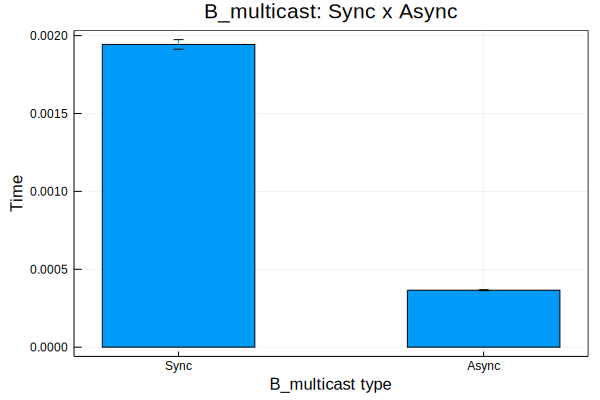

      From worker 8:	oi!
      From worker 10:	oi!


In [21]:
means = zeros((2,1))
zs = zeros((2,1))
means[1,1] = mean(sync_B_multi_times)
means[2,1] = mean(async_B_multi_times)
zs[1,1] = z*std(sync_B_multi_times)/length(sync_B_multi_times)
zs[2,1] = z*std(async_B_multi_times)/length(async_B_multi_times)
names = ["Sync", "Async"]
title = "B_multicast: Sync x Async"
xlabel = "B_multicast type"
groupedbar(names, means, yerr = zs, framestyle = :box, title = title, ylabel = "Time", xlabel = xlabel, bar_width = 0.5, legend = false)

* Qual das duas versões teve o menor tempo de execução? Por quê?

**Resposta**: _O modelo assíncrono foi mais rápido.
O modelo síncrono precisa por em ordem a finalização de cada processo, enquanto o assíncrono não tem essa necessidade._ 
_Exemplo: se cada tivermos um cenário com 3 processos e dois processadores._ 
- _Analisando pelo modelo síncrono: 
    Rodando os processos '1' e '2', o processo '2' termina primeiro, ele tem que esperar o processo '1' finilizar para poder liberar o recurso e o processo '3' iniciar._
- _Analisando pelo modelo assíncrono: 
    A situação descrita anteriormente não ocorre, pois quando o processo '2' finaliza, o processo '3' já pode iniciar instantaneamente._

### Exercício 3: Análise de desempenho do R-multicast (3,0 pontos)

Implemente duas versões do algoritmo R-multicast: uma assíncrona e outra síncrona.

* R-multicast assíncrono
* R-multicast síncrono

In [22]:
@everywhere function R_deliver(workers, from_id, msg, sync)
    global receveid
    println(from_id, " ", msg)
    if !(from_id in receveid)
        push!(receveid, from_id)
        if from_id != myid()
            @sync R_multicast(workers,msg,R_deliver,sync)
        end
    end
end

      From worker 11:	oi!


In [23]:
@everywhere function R_multicast(workers,msg,func,sync)
    id = myid()
    if sync
        for w in workers
            @sync @spawnat w func(workers,id,msg,sync)
        end
    else
        for w in workers
            @spawnat w func(workers,id,msg,sync)
        end
    end
end

In [24]:
function R_multicast_start(workers, worker,msg,func,sync)
    println("Run...")
    @everywhere workers global receveid = Any[]
    if sync
        @sync @spawnat worker R_multicast(workers, string(msg, " from ", string(worker)), func, sync)
    else
        @spawnat worker R_multicast(workers, string(msg, " from ", string(worker)), func, sync)
    end
end

R_multicast_start (generic function with 1 method)

In [25]:
sync_R_multi_times = []
async_R_multi_times = []
z = 1.96 # Value of Z*
n_itr = 50 # Number of interations

@sync for i in 1:n_itr
    push!(sync_R_multi_times, @elapsed R_multicast_start(wrks, myid(),"abc!",R_deliver, true))
    push!(async_R_multi_times, @elapsed R_multicast_start(wrks, myid(),"abc!",R_deliver, false))
end

Run...
      From worker 2:	1 abc! from 1
      From worker 2:	2 abc! from 1
      From worker 3:	2 abc! from 1
      From worker 2:	3 abc! from 1
      From worker 2:	2 abc! from 1
      From worker 3:	2 abc! from 1
      From worker 4:	2 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	2 abc! from 1
      From worker 3:	2 abc! from 1
      From worker 4:	2 abc! from 1
      From worker 5:	2 abc! from 1
      From worker 2:	5 abc! from 1
      From worker 2:	2 abc! from 1
      From worker 3:	2 abc! from 1
      From worker 4:	2 abc! from 1
      From worker 5:	2 abc! from 1
      From worker 6:	2 abc! from 1
      From worker 2:	6 abc! from 1
      From worker 2:	2 abc! from 1
      From worker 3:	2 abc! from 1
      From worker 4:	2 abc! from 1
      From worker 5:	2 abc! from 1
      From worker 6:	2 abc! from 1
      From worker 7:	2 abc! from 1
      From worker 2:	7 abc! from 1
      From worker 2:	2 abc! from 1
      From worker 3:	2 abc! from 1
      From wo

      From worker 8:	5 abc! from 1
      From worker 9:	5 abc! from 1
      From worker 2:	9 abc! from 1
      From worker 3:	9 abc! from 1
      From worker 4:	9 abc! from 1
      From worker 5:	9 abc! from 1
      From worker 2:	5 abc! from 1
      From worker 3:	5 abc! from 1
      From worker 4:	5 abc! from 1
      From worker 5:	5 abc! from 1
      From worker 6:	5 abc! from 1
      From worker 7:	5 abc! from 1
      From worker 8:	5 abc! from 1
      From worker 9:	5 abc! from 1
      From worker 10:	5 abc! from 1
      From worker 2:	10 abc! from 1
      From worker 3:	10 abc! from 1
      From worker 4:	10 abc! from 1
      From worker 5:	10 abc! from 1
      From worker 2:	5 abc! from 1
      From worker 3:	5 abc! from 1
      From worker 4:	5 abc! from 1
      From worker 5:	5 abc! from 1
      From worker 6:	5 abc! from 1
      From worker 7:	5 abc! from 1
      From worker 8:	5 abc! from 1
      From worker 9:	5 abc! from 1
      From worker 10:	5 abc! from 1
      From wor

      From worker 11:	9 abc! from 1
      From worker 2:	11 abc! from 1
      From worker 3:	11 abc! from 1
      From worker 4:	11 abc! from 1
      From worker 5:	11 abc! from 1
      From worker 6:	11 abc! from 1
      From worker 7:	11 abc! from 1
      From worker 8:	11 abc! from 1
      From worker 9:	11 abc! from 1
      From worker 10:	11 abc! from 1
      From worker 2:	10 abc! from 1
      From worker 3:	10 abc! from 1
      From worker 4:	10 abc! from 1
      From worker 5:	10 abc! from 1
      From worker 6:	10 abc! from 1
      From worker 7:	10 abc! from 1
      From worker 8:	10 abc! from 1
      From worker 9:	10 abc! from 1
      From worker 10:	10 abc! from 1
      From worker 11:	10 abc! from 1
      From worker 2:	11 abc! from 1
      From worker 3:	11 abc! from 1
      From worker 4:	11 abc! from 1
      From worker 5:	11 abc! from 1
      From worker 6:	11 abc! from 1
      From worker 7:	11 abc! from 1
      From worker 8:	11 abc! from 1
      From worker 9:	11 a

      From worker 8:	2 abc! from 1
      From worker 9:	2 abc! from 1
      From worker 10:	2 abc! from 1
      From worker 11:	2 abc! from 1
      From worker 3:	4 abc! from 1
      From worker 4:	4 abc! from 1
      From worker 5:	4 abc! from 1
      From worker 6:	4 abc! from 1
      From worker 7:	4 abc! from 1
      From worker 8:	4 abc! from 1
      From worker 9:	4 abc! from 1
      From worker 10:	4 abc! from 1
      From worker 11:	4 abc! from 1
      From worker 5:	2 abc! from 1
      From worker 6:	2 abc! from 1
      From worker 7:	2 abc! from 1
      From worker 8:	2 abc! from 1
      From worker 9:	2 abc! from 1
      From worker 10:	2 abc! from 1
      From worker 11:	2 abc! from 1
      From worker 3:	3 abc! from 1
      From worker 4:	3 abc! from 1
      From worker 5:	3 abc! from 1
      From worker 6:	3 abc! from 1
      From worker 7:	3 abc! from 1
      From worker 8:	3 abc! from 1
      From worker 9:	3 abc! from 1
      From worker 10:	3 abc! from 1
      From wo

      From worker 3:	7 abc! from 1
      From worker 3:	1 abc! from 1
      From worker 3:	9 abc! from 1
      From worker 3:	9 abc! from 1
      From worker 3:	9 abc! from 1
      From worker 3:	9 abc! from 1
      From worker 3:	9 abc! from 1
      From worker 3:	8 abc! from 1
      From worker 3:	8 abc! from 1
      From worker 3:	8 abc! from 1
      From worker 3:	8 abc! from 1
      From worker 3:	4 abc! from 1
      From worker 3:	6 abc! from 1
      From worker 3:	8 abc! from 1
      From worker 3:	7 abc! from 1
      From worker 3:	9 abc! from 1
      From worker 3:	11 abc! from 1
      From worker 3:	10 abc! from 1
      From worker 3:	10 abc! from 1
      From worker 3:	2 abc! from 1
      From worker 3:	5 abc! from 1
      From worker 3:	3 abc! from 1
      From worker 3:	4 abc! from 1
      From worker 3:	3 abc! from 1
      From worker 3:	4 abc! from 1
      From worker 3:	3 abc! from 1
      From worker 3:	4 abc! from 1
      From worker 3:	4 abc! from 1
      From worker

      From worker 2:	5 abc! from 1
      From worker 2:	6 abc! from 1
      From worker 2:	9 abc! from 1
      From worker 2:	5 abc! from 1
      From worker 2:	6 abc! from 1
      From worker 2:	10 abc! from 1
      From worker 4:	9 abc! from 1
      From worker 4:	5 abc! from 1
      From worker 4:	10 abc! from 1
      From worker 4:	6 abc! from 1
      From worker 7:	5 abc! from 1
      From worker 7:	6 abc! from 1
      From worker 7:	9 abc! from 1
      From worker 7:	10 abc! from 1
      From worker 7:	5 abc! from 1
      From worker 2:	5 abc! from 1
      From worker 2:	5 abc! from 1
      From worker 2:	11 abc! from 1
      From worker 2:	11 abc! from 1
      From worker 2:	6 abc! from 1
      From worker 2:	6 abc! from 1
      From worker 2:	10 abc! from 1
      From worker 2:	5 abc! from 1
      From worker 2:	10 abc! from 1
      From worker 2:	6 abc! from 1
      From worker 2:	5 abc! from 1
      From worker 2:	6 abc! from 1
      From worker 2:	10 abc! from 1
      From w

      From worker 5:	10 abc! from 1
      From worker 5:	5 abc! from 1
      From worker 5:	10 abc! from 1
      From worker 5:	6 abc! from 1
      From worker 5:	5 abc! from 1
      From worker 5:	11 abc! from 1
      From worker 5:	6 abc! from 1
      From worker 5:	5 abc! from 1
      From worker 5:	11 abc! from 1
      From worker 5:	6 abc! from 1
      From worker 5:	10 abc! from 1
      From worker 5:	5 abc! from 1
      From worker 5:	10 abc! from 1
      From worker 5:	6 abc! from 1
      From worker 5:	5 abc! from 1
      From worker 5:	10 abc! from 1
      From worker 5:	10 abc! from 1
      From worker 5:	6 abc! from 1
      From worker 5:	10 abc! from 1
      From worker 5:	6 abc! from 1
      From worker 3:	1 abc! from 1
Run...
      From worker 11:	5 abc! from 1
      From worker 11:	5 abc! from 1
      From worker 11:	6 abc! from 1
      From worker 11:	10 abc! from 1
      From worker 11:	10 abc! from 1
      From worker 11:	6 abc! from 1
      From worker 11:	6 abc! fr

      From worker 8:	4 abc! from 1
      From worker 8:	3 abc! from 1
      From worker 8:	8 abc! from 1
      From worker 8:	4 abc! from 1
      From worker 8:	7 abc! from 1
      From worker 8:	2 abc! from 1
      From worker 8:	8 abc! from 1
      From worker 8:	11 abc! from 1
      From worker 8:	4 abc! from 1
      From worker 8:	3 abc! from 1
      From worker 3:	4 abc! from 1
      From worker 3:	3 abc! from 1
      From worker 3:	7 abc! from 1
      From worker 3:	8 abc! from 1
      From worker 3:	3 abc! from 1
      From worker 9:	1 abc! from 1
      From worker 9:	3 abc! from 1
      From worker 9:	3 abc! from 1
      From worker 6:	1 abc! from 1
      From worker 6:	2 abc! from 1
      From worker 10:	1 abc! from 1
      From worker 10:	3 abc! from 1
      From worker 5:	1 abc! from 1
      From worker 11:	3 abc! from 1
      From worker 11:	4 abc! from 1
      From worker 11:	7 abc! from 1
      From worker 11:	3 abc! from 1
      From worker 11:	2 abc! from 1
      From w

      From worker 2:	4 abc! from 1
      From worker 10:	8 abc! from 1
      From worker 8:	6 abc! from 1
      From worker 9:	8 abc! from 1
      From worker 5:	8 abc! from 1
      From worker 5:	8 abc! from 1
      From worker 5:	8 abc! from 1
      From worker 5:	8 abc! from 1
      From worker 5:	8 abc! from 1
      From worker 5:	8 abc! from 1
      From worker 5:	8 abc! from 1
      From worker 5:	7 abc! from 1
      From worker 10:	8 abc! from 1
      From worker 10:	8 abc! from 1
      From worker 10:	8 abc! from 1
      From worker 10:	8 abc! from 1
      From worker 10:	8 abc! from 1
      From worker 10:	8 abc! from 1
      From worker 10:	8 abc! from 1
      From worker 10:	11 abc! from 1
      From worker 10:	11 abc! from 1
      From worker 8:	6 abc! from 1
      From worker 8:	9 abc! from 1
      From worker 8:	9 abc! from 1
      From worker 8:	9 abc! from 1
      From worker 8:	9 abc! from 1
      From worker 8:	9 abc! from 1
      From worker 8:	9 abc! from 1
      Fr

      From worker 6:	10 abc! from 1
      From worker 6:	10 abc! from 1
      From worker 9:	3 abc! from 1
      From worker 9:	10 abc! from 1
      From worker 9:	9 abc! from 1
      From worker 9:	10 abc! from 1
      From worker 9:	5 abc! from 1
      From worker 9:	6 abc! from 1
      From worker 9:	9 abc! from 1
      From worker 9:	8 abc! from 1
      From worker 9:	10 abc! from 1
      From worker 9:	5 abc! from 1
      From worker 9:	8 abc! from 1
      From worker 9:	9 abc! from 1
      From worker 9:	10 abc! from 1
      From worker 9:	5 abc! from 1
      From worker 9:	8 abc! from 1
      From worker 9:	8 abc! from 1
      From worker 9:	7 abc! from 1
      From worker 9:	9 abc! from 1
      From worker 9:	10 abc! from 1
      From worker 9:	10 abc! from 1
      From worker 9:	7 abc! from 1
      From worker 9:	9 abc! from 1
      From worker 9:	2 abc! from 1
      From worker 9:	5 abc! from 1
      From worker 9:	7 abc! from 1
      From worker 9:	7 abc! from 1
      From w

      From worker 2:	5 abc! from 1
      From worker 2:	5 abc! from 1
      From worker 2:	5 abc! from 1
      From worker 2:	5 abc! from 1
      From worker 2:	5 abc! from 1
      From worker 2:	1 abc! from 1
      From worker 2:	8 abc! from 1
      From worker 2:	8 abc! from 1
      From worker 2:	6 abc! from 1
      From worker 2:	8 abc! from 1
      From worker 2:	7 abc! from 1
      From worker 2:	11 abc! from 1
      From worker 2:	2 abc! from 1
      From worker 2:	8 abc! from 1
      From worker 2:	8 abc! from 1
      From worker 2:	3 abc! from 1
      From worker 2:	7 abc! from 1
      From worker 2:	11 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	2 abc! from 1
      From worker 2:	11 abc! from 1
      From worker 2:	8 abc! from 1
      From worker 2:	3 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	3 abc! from 1
      From worker 2:	2 abc! from 1
      From worker 2:	8 abc! from 1
      From worker

      From worker 2:	11 abc! from 1
      From worker 3:	11 abc! from 1
      From worker 4:	11 abc! from 1
      From worker 5:	11 abc! from 1
      From worker 6:	11 abc! from 1
      From worker 7:	11 abc! from 1
      From worker 8:	11 abc! from 1
      From worker 9:	11 abc! from 1
      From worker 10:	11 abc! from 1
      From worker 11:	11 abc! from 1
Run...
Run...
      From worker 2:	1 abc! from 1
      From worker 2:	2 abc! from 1
      From worker 2:	3 abc! from 1
      From worker 2:	5 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	3 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	7 abc! from 1
      From worker 2:	3 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	5 abc! from 1
      From worker 2:	7 abc! from 1
      From worker 2:	8 abc! from 1
      From worker 3:	1 abc! from 1
      From worker 3:	2 abc! from 1
      From worker 3:	3 abc! from 1
      From worker 3:	7 abc! from 1
      From worker 3:	8 abc! f

      From worker 5:	9 abc! from 1
      From worker 5:	10 abc! from 1
      From worker 5:	10 abc! from 1
      From worker 2:	7 abc! from 1
      From worker 7:	9 abc! from 1
      From worker 7:	9 abc! from 1
      From worker 7:	9 abc! from 1
      From worker 7:	9 abc! from 1
      From worker 7:	9 abc! from 1
      From worker 7:	9 abc! from 1
      From worker 7:	9 abc! from 1
      From worker 7:	1 abc! from 1
      From worker 7:	5 abc! from 1
      From worker 7:	5 abc! from 1
      From worker 7:	11 abc! from 1
      From worker 7:	5 abc! from 1
      From worker 7:	5 abc! from 1
      From worker 7:	8 abc! from 1
      From worker 7:	10 abc! from 1
      From worker 7:	11 abc! from 1
      From worker 7:	11 abc! from 1
      From worker 7:	11 abc! from 1
      From worker 7:	11 abc! from 1
      From worker 7:	11 abc! from 1
      From worker 7:	11 abc! from 1
      From worker 7:	3 abc! from 1
      From worker 7:	3 abc! from 1
      From worker 7:	3 abc! from 1
      From

      From worker 6:	10 abc! from 1
      From worker 6:	8 abc! from 1
      From worker 6:	6 abc! from 1
      From worker 6:	9 abc! from 1
      From worker 6:	9 abc! from 1
      From worker 6:	1 abc! from 1
      From worker 6:	5 abc! from 1
      From worker 6:	6 abc! from 1
      From worker 6:	9 abc! from 1
      From worker 6:	11 abc! from 1
      From worker 6:	3 abc! from 1
      From worker 6:	9 abc! from 1
      From worker 6:	10 abc! from 1
      From worker 6:	9 abc! from 1
      From worker 6:	3 abc! from 1
      From worker 6:	11 abc! from 1
      From worker 6:	10 abc! from 1
      From worker 6:	10 abc! from 1
      From worker 6:	9 abc! from 1
      From worker 6:	10 abc! from 1
      From worker 6:	5 abc! from 1
      From worker 6:	9 abc! from 1
      From worker 6:	11 abc! from 1
      From worker 6:	5 abc! from 1
      From worker 6:	11 abc! from 1
      From worker 6:	10 abc! from 1
      From worker 6:	5 abc! from 1
      From worker 6:	10 abc! from 1
      Fro

      From worker 5:	8 abc! from 1
      From worker 5:	8 abc! from 1
      From worker 5:	4 abc! from 1
      From worker 5:	8 abc! from 1
      From worker 5:	4 abc! from 1
      From worker 5:	9 abc! from 1
      From worker 5:	8 abc! from 1
      From worker 5:	4 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	8 abc! from 1
      From worker 2:	8 abc! from 1
      From worker 2:	8 abc! from 1
      From worker 2:	8 abc! from 1
      From worker 2:	8 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	9 abc! from 1
      From worker 7:	4 abc! from 1
      From worker 7:	4 abc! from 1
      From worker 7:	4 abc! from 1
      From worker 7:	8 abc! from 1
      From worker 7:	8 abc! from 1
      From worker 7:	8 abc! from 1
      From worker 7:	9 abc! from 1
      From worker 7:	4 abc! from 1
      From worker 7:

Run...
      From worker 2:	1 abc! from 1
      From worker 6:	4 abc! from 1
      From worker 11:	4 abc! from 1
      From worker 4:	1 abc! from 1
      From worker 6:	1 abc! from 1
      From worker 2:	2 abc! from 1
      From worker 7:	4 abc! from 1
      From worker 8:	4 abc! from 1
      From worker 4:	4 abc! from 1
      From worker 4:	2 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 7:	1 abc! from 1
      From worker 8:	2 abc! from 1
      From worker 11:	1 abc! from 1
      From worker 4:	7 abc! from 1
      From worker 6:	7 abc! from 1
      From worker 7:	2 abc! from 1
      From worker 2:	8 abc! from 1
      From worker 11:	7 abc! from 1
      From worker 8:	1 abc! from 1
      From worker 11:	2 abc! from 1
      From worker 4:	6 abc! from 1
      From worker 6:	6 abc! from 1
      From worker 2:	11 abc! from 1
      From worker 11:	11 abc! from 1
      From worker 8:	6 abc! from 1
      From worker 6:	6 abc! from 1
      From worker 11:	6 abc! from 1
     

      From worker 7:	2 abc! from 1
      From worker 7:	8 abc! from 1
      From worker 7:	8 abc! from 1
      From worker 7:	8 abc! from 1
      From worker 7:	8 abc! from 1
      From worker 7:	8 abc! from 1
      From worker 7:	5 abc! from 1
      From worker 7:	5 abc! from 1
      From worker 7:	5 abc! from 1
      From worker 7:	5 abc! from 1
      From worker 7:	5 abc! from 1
      From worker 7:	7 abc! from 1
      From worker 7:	10 abc! from 1
      From worker 3:	2 abc! from 1
      From worker 3:	2 abc! from 1
      From worker 4:	10 abc! from 1
      From worker 4:	10 abc! from 1
      From worker 4:	10 abc! from 1
      From worker 4:	5 abc! from 1
      From worker 4:	7 abc! from 1
      From worker 4:	2 abc! from 1
      From worker 4:	5 abc! from 1
      From worker 4:	10 abc! from 1
      From worker 4:	2 abc! from 1
      From worker 2:	8 abc! from 1
      From worker 2:	11 abc! from 1
      From worker 2:	2 abc! from 1
      From worker 2:	4 abc! from 1
      From wor

      From worker 5:	4 abc! from 1
      From worker 10:	2 abc! from 1
      From worker 10:	4 abc! from 1
      From worker 10:	3 abc! from 1
      From worker 10:	3 abc! from 1
      From worker 10:	7 abc! from 1
      From worker 10:	8 abc! from 1
      From worker 10:	11 abc! from 1
      From worker 10:	3 abc! from 1
      From worker 10:	5 abc! from 1
      From worker 10:	6 abc! from 1
      From worker 10:	3 abc! from 1
      From worker 10:	10 abc! from 1
      From worker 10:	2 abc! from 1
      From worker 10:	5 abc! from 1
      From worker 6:	2 abc! from 1
      From worker 6:	3 abc! from 1
      From worker 6:	3 abc! from 1
      From worker 6:	6 abc! from 1
      From worker 6:	4 abc! from 1
      From worker 6:	7 abc! from 1
      From worker 6:	8 abc! from 1
      From worker 6:	11 abc! from 1
      From worker 6:	3 abc! from 1
      From worker 6:	5 abc! from 1
      From worker 6:	3 abc! from 1
      From worker 6:	10 abc! from 1
      From worker 6:	9 abc! from 1
  

      From worker 9:	11 abc! from 1
      From worker 9:	8 abc! from 1
      From worker 9:	8 abc! from 1
      From worker 9:	8 abc! from 1
      From worker 9:	8 abc! from 1
      From worker 9:	8 abc! from 1
      From worker 11:	9 abc! from 1
      From worker 11:	3 abc! from 1
      From worker 11:	3 abc! from 1
      From worker 11:	9 abc! from 1
      From worker 11:	9 abc! from 1
      From worker 11:	3 abc! from 1
      From worker 11:	10 abc! from 1
      From worker 11:	9 abc! from 1
      From worker 11:	9 abc! from 1
      From worker 5:	3 abc! from 1
      From worker 5:	9 abc! from 1
      From worker 5:	9 abc! from 1
      From worker 5:	3 abc! from 1
      From worker 5:	9 abc! from 1
      From worker 5:	10 abc! from 1
      From worker 5:	9 abc! from 1
      From worker 6:	9 abc! from 1
      From worker 6:	3 abc! from 1
      From worker 6:	9 abc! from 1
      From worker 6:	10 abc! from 1
      From worker 6:	9 abc! from 1
      From worker 6:	9 abc! from 1
      F

      From worker 5:	5 abc! from 1
      From worker 5:	10 abc! from 1
      From worker 5:	4 abc! from 1
      From worker 5:	3 abc! from 1
      From worker 5:	10 abc! from 1
      From worker 5:	8 abc! from 1
      From worker 5:	3 abc! from 1
      From worker 5:	5 abc! from 1
      From worker 5:	10 abc! from 1
      From worker 5:	4 abc! from 1
      From worker 5:	9 abc! from 1
      From worker 5:	3 abc! from 1
      From worker 5:	8 abc! from 1
      From worker 5:	5 abc! from 1
      From worker 5:	10 abc! from 1
      From worker 5:	9 abc! from 1
      From worker 5:	3 abc! from 1
      From worker 5:	5 abc! from 1
      From worker 5:	8 abc! from 1
      From worker 5:	3 abc! from 1
      From worker 5:	8 abc! from 1
      From worker 5:	4 abc! from 1
      From worker 5:	9 abc! from 1
      From worker 5:	5 abc! from 1
      From worker 5:	10 abc! from 1
      From worker 5:	8 abc! from 1
      From worker 5:	9 abc! from 1
      From worker 5:	5 abc! from 1
      From work

      From worker 8:	11 abc! from 1
      From worker 8:	7 abc! from 1
      From worker 8:	11 abc! from 1
      From worker 8:	7 abc! from 1
      From worker 8:	4 abc! from 1
      From worker 8:	5 abc! from 1
      From worker 8:	7 abc! from 1
      From worker 8:	8 abc! from 1
      From worker 8:	8 abc! from 1
      From worker 8:	11 abc! from 1
      From worker 8:	10 abc! from 1
      From worker 8:	9 abc! from 1
      From worker 3:	2 abc! from 1
      From worker 7:	4 abc! from 1
      From worker 7:	4 abc! from 1
      From worker 7:	5 abc! from 1
      From worker 7:	4 abc! from 1
      From worker 7:	4 abc! from 1
      From worker 7:	4 abc! from 1
      From worker 7:	4 abc! from 1
      From worker 7:	4 abc! from 1
      From worker 7:	4 abc! from 1
      From worker 7:	10 abc! from 1
      From worker 7:	2 abc! from 1
      From worker 2:	11 abc! from 1
      From worker 5:	7 abc! from 1
      From worker 5:	11 abc! from 1
      From worker 5:	8 abc! from 1
      From wo

      From worker 3:	6 abc! from 1
      From worker 3:	5 abc! from 1
      From worker 3:	7 abc! from 1
      From worker 3:	9 abc! from 1
      From worker 3:	3 abc! from 1
      From worker 3:	11 abc! from 1
      From worker 3:	4 abc! from 1
      From worker 3:	6 abc! from 1
      From worker 10:	2 abc! from 1
      From worker 10:	2 abc! from 1
      From worker 10:	2 abc! from 1
      From worker 10:	2 abc! from 1
      From worker 10:	2 abc! from 1
      From worker 10:	7 abc! from 1
      From worker 10:	7 abc! from 1
      From worker 10:	3 abc! from 1
      From worker 10:	3 abc! from 1
      From worker 10:	3 abc! from 1
      From worker 10:	6 abc! from 1
      From worker 10:	6 abc! from 1
      From worker 10:	6 abc! from 1
      From worker 8:	7 abc! from 1
      From worker 8:	7 abc! from 1
      From worker 8:	3 abc! from 1
      From worker 8:	3 abc! from 1
      From worker 8:	3 abc! from 1
      From worker 8:	2 abc! from 1
      From worker 8:	2 abc! from 1
      

      From worker 4:	6 abc! from 1
      From worker 4:	6 abc! from 1
      From worker 3:	6 abc! from 1
      From worker 3:	6 abc! from 1
      From worker 10:	6 abc! from 1
      From worker 10:	6 abc! from 1
      From worker 8:	6 abc! from 1
      From worker 8:	4 abc! from 1
      From worker 7:	6 abc! from 1
      From worker 7:	4 abc! from 1
      From worker 6:	7 abc! from 1
      From worker 6:	7 abc! from 1
      From worker 6:	7 abc! from 1
      From worker 6:	7 abc! from 1
      From worker 6:	7 abc! from 1
      From worker 6:	7 abc! from 1
      From worker 6:	7 abc! from 1
      From worker 6:	2 abc! from 1
      From worker 6:	3 abc! from 1
      From worker 6:	2 abc! from 1
      From worker 6:	2 abc! from 1
      From worker 6:	5 abc! from 1
      From worker 6:	7 abc! from 1
      From worker 6:	9 abc! from 1
      From worker 6:	3 abc! from 1
      From worker 6:	11 abc! from 1
      From worker 6:	4 abc! from 1
      From worker 6:	2 abc! from 1
      From worker

      From worker 11:	3 abc! from 1
      From worker 11:	2 abc! from 1
      From worker 11:	4 abc! from 1
      From worker 11:	6 abc! from 1
      From worker 11:	6 abc! from 1
      From worker 11:	11 abc! from 1
      From worker 11:	2 abc! from 1
      From worker 11:	5 abc! from 1
      From worker 11:	7 abc! from 1
      From worker 11:	5 abc! from 1
      From worker 11:	3 abc! from 1
      From worker 11:	2 abc! from 1
      From worker 11:	3 abc! from 1
      From worker 11:	4 abc! from 1
      From worker 11:	6 abc! from 1
      From worker 11:	7 abc! from 1
      From worker 11:	5 abc! from 1
      From worker 11:	6 abc! from 1
      From worker 11:	3 abc! from 1
      From worker 8:	4 abc! from 1
      From worker 9:	4 abc! from 1
      From worker 4:	5 abc! from 1
      From worker 4:	7 abc! from 1
      From worker 4:	4 abc! from 1
      From worker 4:	8 abc! from 1
      From worker 4:	11 abc! from 1
      From worker 4:	11 abc! from 1
      From worker 4:	4 abc! from 

      From worker 8:	8 abc! from 1
      From worker 8:	9 abc! from 1
      From worker 8:	8 abc! from 1
      From worker 8:	11 abc! from 1
      From worker 10:	1 abc! from 1
      From worker 9:	11 abc! from 1
      From worker 9:	11 abc! from 1
      From worker 9:	11 abc! from 1
      From worker 4:	8 abc! from 1
      From worker 4:	11 abc! from 1
      From worker 4:	10 abc! from 1
      From worker 4:	4 abc! from 1
      From worker 4:	10 abc! from 1
      From worker 4:	5 abc! from 1
      From worker 4:	2 abc! from 1
      From worker 6:	11 abc! from 1
      From worker 2:	8 abc! from 1
      From worker 2:	11 abc! from 1
      From worker 2:	10 abc! from 1
      From worker 2:	1 abc! from 1
      From worker 2:	2 abc! from 1
      From worker 2:	10 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	5 abc! from 1
      From worker 2:	2 abc! from 1
      From worker 2:	7 abc! from 1
      From worker 5:	11 abc! from 1
      From worker 5:	10 abc! from 1
      

      From worker 10:	8 abc! from 1
      From worker 10:	8 abc! from 1
      From worker 10:	8 abc! from 1
      From worker 9:	10 abc! from 1
      From worker 9:	6 abc! from 1
      From worker 9:	4 abc! from 1
      From worker 9:	6 abc! from 1
      From worker 9:	3 abc! from 1
      From worker 9:	6 abc! from 1
      From worker 4:	6 abc! from 1
      From worker 4:	4 abc! from 1
      From worker 4:	6 abc! from 1
      From worker 4:	3 abc! from 1
      From worker 4:	6 abc! from 1
      From worker 6:	4 abc! from 1
      From worker 6:	5 abc! from 1
      From worker 6:	7 abc! from 1
      From worker 6:	2 abc! from 1
      From worker 6:	3 abc! from 1
      From worker 6:	11 abc! from 1
      From worker 6:	11 abc! from 1
      From worker 6:	11 abc! from 1
      From worker 6:	11 abc! from 1
      From worker 6:	1 abc! from 1
      From worker 6:	5 abc! from 1
      From worker 6:	6 abc! from 1
      From worker 6:	5 abc! from 1
      From worker 6:	5 abc! from 1
      From w

      From worker 3:	4 abc! from 1
      From worker 3:	10 abc! from 1
      From worker 4:	1 abc! from 1
      From worker 4:	2 abc! from 1
      From worker 4:	4 abc! from 1
      From worker 4:	3 abc! from 1
      From worker 4:	4 abc! from 1
      From worker 4:	11 abc! from 1
      From worker 4:	5 abc! from 1
      From worker 4:	3 abc! from 1
      From worker 4:	10 abc! from 1
      From worker 4:	10 abc! from 1
      From worker 4:	11 abc! from 1
      From worker 4:	11 abc! from 1
      From worker 4:	3 abc! from 1
      From worker 4:	5 abc! from 1
      From worker 4:	4 abc! from 1
      From worker 4:	3 abc! from 1
      From worker 4:	2 abc! from 1
      From worker 4:	10 abc! from 1
      From worker 4:	3 abc! from 1
      From worker 4:	10 abc! from 1
      From worker 4:	5 abc! from 1
      From worker 4:	11 abc! from 1
      From worker 4:	4 abc! from 1
      From worker 4:	2 abc! from 1
      From worker 4:	4 abc! from 1
      From worker 4:	2 abc! from 1
      From 

      From worker 2:	8 abc! from 1
      From worker 9:	9 abc! from 1
      From worker 8:	4 abc! from 1
      From worker 8:	4 abc! from 1
      From worker 8:	4 abc! from 1
      From worker 8:	4 abc! from 1
      From worker 8:	4 abc! from 1
      From worker 8:	3 abc! from 1
      From worker 8:	4 abc! from 1
      From worker 8:	11 abc! from 1
      From worker 8:	3 abc! from 1
      From worker 8:	3 abc! from 1
      From worker 8:	3 abc! from 1
      From worker 8:	3 abc! from 1
      From worker 8:	3 abc! from 1
      From worker 8:	2 abc! from 1
      From worker 8:	2 abc! from 1
      From worker 8:	2 abc! from 1
      From worker 8:	2 abc! from 1
      From worker 8:	2 abc! from 1
      From worker 8:	2 abc! from 1
      From worker 8:	2 abc! from 1
      From worker 8:	5 abc! from 1
      From worker 8:	5 abc! from 1
      From worker 8:	5 abc! from 1
      From worker 8:	5 abc! from 1
      From worker 8:	5 abc! from 1
      From worker 8:	10 abc! from 1
      From worker 

      From worker 10:	5 abc! from 1
      From worker 10:	4 abc! from 1
      From worker 10:	6 abc! from 1
      From worker 10:	5 abc! from 1
      From worker 10:	2 abc! from 1
      From worker 10:	7 abc! from 1
      From worker 4:	6 abc! from 1
      From worker 4:	5 abc! from 1
      From worker 4:	4 abc! from 1
      From worker 4:	6 abc! from 1
      From worker 4:	5 abc! from 1
      From worker 6:	6 abc! from 1
      From worker 6:	4 abc! from 1
      From worker 6:	4 abc! from 1
      From worker 6:	4 abc! from 1
      From worker 6:	3 abc! from 1
      From worker 6:	3 abc! from 1
      From worker 6:	6 abc! from 1
      From worker 6:	3 abc! from 1
      From worker 6:	3 abc! from 1
      From worker 6:	3 abc! from 1
      From worker 6:	3 abc! from 1
      From worker 6:	5 abc! from 1
      From worker 6:	5 abc! from 1
      From worker 6:	6 abc! from 1
      From worker 6:	5 abc! from 1
      From worker 6:	5 abc! from 1
      From worker 6:	5 abc! from 1
      From wor

      From worker 6:	3 abc! from 1
      From worker 6:	3 abc! from 1
      From worker 6:	3 abc! from 1
      From worker 6:	5 abc! from 1
      From worker 6:	4 abc! from 1
      From worker 6:	5 abc! from 1
      From worker 6:	7 abc! from 1
      From worker 6:	2 abc! from 1
      From worker 6:	6 abc! from 1
      From worker 6:	8 abc! from 1
      From worker 6:	7 abc! from 1
      From worker 6:	7 abc! from 1
      From worker 6:	4 abc! from 1
      From worker 6:	5 abc! from 1
      From worker 6:	7 abc! from 1
      From worker 6:	5 abc! from 1
      From worker 6:	3 abc! from 1
      From worker 6:	7 abc! from 1
      From worker 6:	9 abc! from 1
      From worker 6:	2 abc! from 1
      From worker 6:	7 abc! from 1
      From worker 6:	11 abc! from 1
      From worker 6:	7 abc! from 1
      From worker 2:	7 abc! from 1
      From worker 2:	6 abc! from 1
      From worker 2:	11 abc! from 1
      From worker 2:	7 abc! from 1
      From worker 5:	7 abc! from 1
      From worker 

      From worker 3:	10 abc! from 1
      From worker 5:	2 abc! from 1
      From worker 10:	8 abc! from 1
      From worker 10:	1 abc! from 1
      From worker 10:	3 abc! from 1
      From worker 10:	3 abc! from 1
      From worker 10:	3 abc! from 1
      From worker 10:	5 abc! from 1
      From worker 10:	6 abc! from 1
      From worker 10:	10 abc! from 1
      From worker 10:	11 abc! from 1
      From worker 10:	11 abc! from 1
      From worker 10:	8 abc! from 1
      From worker 10:	11 abc! from 1
      From worker 10:	8 abc! from 1
      From worker 10:	11 abc! from 1
      From worker 10:	8 abc! from 1
      From worker 10:	10 abc! from 1
      From worker 10:	5 abc! from 1
      From worker 11:	11 abc! from 1
      From worker 11:	8 abc! from 1
      From worker 11:	6 abc! from 1
      From worker 11:	2 abc! from 1
      From worker 8:	11 abc! from 1
      From worker 8:	3 abc! from 1
      From worker 8:	10 abc! from 1
      From worker 8:	2 abc! from 1
      From worker 8:	11 

      From worker 4:	2 abc! from 1
      From worker 10:	4 abc! from 1
      From worker 10:	9 abc! from 1
      From worker 2:	1 abc! from 1
      From worker 2:	2 abc! from 1
      From worker 2:	6 abc! from 1
      From worker 2:	9 abc! from 1
      From worker 7:	3 abc! from 1
      From worker 7:	3 abc! from 1
      From worker 7:	2 abc! from 1
      From worker 6:	5 abc! from 1
      From worker 6:	6 abc! from 1
      From worker 6:	9 abc! from 1
      From worker 9:	4 abc! from 1
      From worker 11:	5 abc! from 1
      From worker 11:	10 abc! from 1
      From worker 11:	6 abc! from 1
      From worker 11:	2 abc! from 1
      From worker 11:	6 abc! from 1
      From worker 11:	5 abc! from 1
      From worker 4:	2 abc! from 1
      From worker 4:	7 abc! from 1
      From worker 4:	10 abc! from 1
      From worker 4:	10 abc! from 1
      From worker 4:	10 abc! from 1
      From worker 4:	10 abc! from 1
      From worker 10:	2 abc! from 1
      From worker 2:	7 abc! from 1
      

      From worker 7:	10 abc! from 1
      From worker 7:	11 abc! from 1
      From worker 7:	7 abc! from 1
      From worker 7:	9 abc! from 1
      From worker 7:	11 abc! from 1
      From worker 7:	4 abc! from 1
      From worker 7:	11 abc! from 1
      From worker 7:	9 abc! from 1
      From worker 7:	7 abc! from 1
      From worker 7:	7 abc! from 1
      From worker 7:	9 abc! from 1
      From worker 7:	4 abc! from 1
      From worker 7:	5 abc! from 1
      From worker 7:	9 abc! from 1
      From worker 10:	11 abc! from 1
      From worker 10:	11 abc! from 1
      From worker 10:	9 abc! from 1
      From worker 10:	9 abc! from 1
      From worker 10:	7 abc! from 1
      From worker 10:	7 abc! from 1
      From worker 10:	4 abc! from 1
      From worker 10:	9 abc! from 1
      From worker 10:	7 abc! from 1
      From worker 10:	4 abc! from 1
      From worker 3:	4 abc! from 1
      From worker 3:	4 abc! from 1
      From worker 3:	4 abc! from 1
      From worker 6:	9 abc! from 1
    

      From worker 8:	4 abc! from 1
      From worker 8:	11 abc! from 1
      From worker 8:	11 abc! from 1
      From worker 8:	11 abc! from 1
      From worker 8:	11 abc! from 1
      From worker 8:	11 abc! from 1
      From worker 8:	11 abc! from 1
      From worker 8:	6 abc! from 1
      From worker 8:	6 abc! from 1
      From worker 8:	6 abc! from 1
      From worker 8:	9 abc! from 1
      From worker 8:	9 abc! from 1
      From worker 8:	9 abc! from 1
      From worker 8:	9 abc! from 1
      From worker 8:	9 abc! from 1
      From worker 8:	9 abc! from 1
      From worker 8:	9 abc! from 1
      From worker 8:	9 abc! from 1
      From worker 8:	2 abc! from 1
      From worker 8:	5 abc! from 1
      From worker 8:	9 abc! from 1
      From worker 8:	3 abc! from 1
      From worker 8:	8 abc! from 1
      From worker 8:	1 abc! from 1
      From worker 2:	1 abc! from 1
      From worker 2:	2 abc! from 1
      From worker 2:	3 abc! from 1
      From worker 3:	1 abc! from 1
      From wor

      From worker 6:	10 abc! from 1
      From worker 6:	2 abc! from 1
      From worker 6:	7 abc! from 1
      From worker 6:	5 abc! from 1
      From worker 6:	7 abc! from 1
      From worker 6:	2 abc! from 1
      From worker 6:	10 abc! from 1
      From worker 6:	5 abc! from 1
      From worker 4:	2 abc! from 1
      From worker 11:	3 abc! from 1
      From worker 7:	2 abc! from 1
      From worker 7:	5 abc! from 1
      From worker 7:	6 abc! from 1
      From worker 7:	10 abc! from 1
      From worker 7:	7 abc! from 1
      From worker 7:	2 abc! from 1
      From worker 7:	10 abc! from 1
      From worker 7:	6 abc! from 1
      From worker 7:	7 abc! from 1
      From worker 7:	2 abc! from 1
      From worker 7:	6 abc! from 1
      From worker 7:	7 abc! from 1
      From worker 7:	5 abc! from 1
      From worker 7:	6 abc! from 1
      From worker 10:	3 abc! from 1
      From worker 3:	7 abc! from 1
      From worker 5:	10 abc! from 1
      From worker 5:	7 abc! from 1
      From wo

      From worker 8:	5 abc! from 1
      From worker 8:	5 abc! from 1
      From worker 8:	5 abc! from 1
      From worker 8:	5 abc! from 1
      From worker 8:	5 abc! from 1
      From worker 8:	5 abc! from 1
      From worker 8:	5 abc! from 1
      From worker 8:	5 abc! from 1
      From worker 7:	11 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	9 abc! from 1
      From worker 11:	11 abc! from 1
      From worker 11:	6 abc! from 1
      From worker 11:	6 abc! from 1
      From worker 11:	6 abc! from 1
      From worker 11:	6 abc! from 1
      From worker 11:	6 abc! from 1
      From worker 11:	6 abc! from 1
      From worker 11:	6 abc! from 1
      From worker 11:	5 abc! from 1
      From worker 11:	5 abc! from 1
      From worker 11:	5 abc! from 1
      From worker 11:	5 abc! from 1
      From worker 11:	5 abc! from 1
      From worker 11:	5 abc! from 1
      From worker 11:	5 abc! from 1
      From worker 11:	5 abc! from 1
      From worker 11:	5 abc! from 1
 

      From worker 5:	4 abc! from 1
      From worker 5:	4 abc! from 1
      From worker 5:	7 abc! from 1
      From worker 5:	3 abc! from 1
      From worker 5:	11 abc! from 1
      From worker 5:	2 abc! from 1
      From worker 5:	10 abc! from 1
      From worker 5:	9 abc! from 1
      From worker 5:	9 abc! from 1
      From worker 5:	8 abc! from 1
      From worker 5:	4 abc! from 1
      From worker 5:	9 abc! from 1
      From worker 5:	11 abc! from 1
      From worker 5:	4 abc! from 1
      From worker 5:	5 abc! from 1
      From worker 5:	4 abc! from 1
      From worker 5:	7 abc! from 1
      From worker 5:	6 abc! from 1
      From worker 5:	7 abc! from 1
      From worker 5:	7 abc! from 1
      From worker 5:	6 abc! from 1
      From worker 5:	9 abc! from 1
      From worker 3:	9 abc! from 1
      From worker 3:	11 abc! from 1
      From worker 3:	11 abc! from 1
      From worker 3:	11 abc! from 1
      From worker 3:	11 abc! from 1
      From worker 3:	2 abc! from 1
      From wo

      From worker 8:	10 abc! from 1
      From worker 8:	9 abc! from 1
      From worker 8:	8 abc! from 1
      From worker 8:	9 abc! from 1
      From worker 8:	4 abc! from 1
      From worker 8:	9 abc! from 1
      From worker 8:	11 abc! from 1
      From worker 8:	4 abc! from 1
      From worker 8:	5 abc! from 1
      From worker 8:	11 abc! from 1
      From worker 8:	9 abc! from 1
      From worker 8:	9 abc! from 1
      From worker 8:	9 abc! from 1
      From worker 8:	4 abc! from 1
      From worker 8:	4 abc! from 1
      From worker 8:	4 abc! from 1
      From worker 8:	7 abc! from 1
      From worker 8:	7 abc! from 1
      From worker 8:	7 abc! from 1
      From worker 8:	7 abc! from 1
      From worker 8:	3 abc! from 1
      From worker 8:	6 abc! from 1
      From worker 8:	6 abc! from 1
      From worker 8:	8 abc! from 1
      From worker 8:	8 abc! from 1
      From worker 8:	9 abc! from 1
      From worker 8:	9 abc! from 1
      From worker 8:	8 abc! from 1
      From worker

      From worker 9:	4 abc! from 1
      From worker 9:	2 abc! from 1
      From worker 9:	2 abc! from 1
      From worker 9:	2 abc! from 1
      From worker 9:	2 abc! from 1
      From worker 9:	2 abc! from 1
      From worker 9:	2 abc! from 1
      From worker 9:	2 abc! from 1
      From worker 8:	2 abc! from 1
      From worker 5:	10 abc! from 1
      From worker 5:	4 abc! from 1
      From worker 5:	4 abc! from 1
      From worker 5:	5 abc! from 1
      From worker 5:	3 abc! from 1
      From worker 3:	9 abc! from 1
      From worker 3:	10 abc! from 1
      From worker 10:	3 abc! from 1
      From worker 10:	4 abc! from 1
      From worker 10:	4 abc! from 1
      From worker 10:	4 abc! from 1
      From worker 10:	4 abc! from 1
      From worker 10:	4 abc! from 1
      From worker 10:	4 abc! from 1
      From worker 10:	4 abc! from 1
      From worker 10:	8 abc! from 1
      From worker 10:	8 abc! from 1
      From worker 10:	9 abc! from 1
      From worker 10:	8 abc! from 1
      

      From worker 7:	10 abc! from 1
      From worker 7:	10 abc! from 1
      From worker 7:	10 abc! from 1
      From worker 7:	10 abc! from 1
      From worker 7:	8 abc! from 1
      From worker 7:	11 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 6:	7 abc! from 1
      From worker 6:	3 abc! from 1
      From worker 6:	6 abc! from 1
      From worker 6:	6 abc! from 1
      From worker 6:	5 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 10:	11 abc! from 1
      From worker 10:	7 abc! from 1
      From worker 10:	6 abc! from 1
      From worker 10:	11 abc! from 1
      From worker 10:	6 abc! from 1
      From worker 9:	6 abc! from 1
      From worker 9:	11 abc! from 1
      From worker 9:	7 abc! from 1
      From worker 11:	3 abc! from 1
      From worker 11:	11 abc! from 1
      From worker 11:	3 abc! from 1
      From worker 11:	3 abc! from 1
      From worker 11:	3 abc! from 1
      From worker 11:	3 abc! from 1
      From worker 11:	3 abc! from 1

      From worker 9:	6 abc! from 1
      From worker 9:	6 abc! from 1
      From worker 9:	5 abc! from 1
      From worker 10:	6 abc! from 1
      From worker 10:	6 abc! from 1
      From worker 10:	5 abc! from 1
      From worker 4:	7 abc! from 1
      From worker 4:	7 abc! from 1
      From worker 4:	8 abc! from 1
      From worker 4:	4 abc! from 1
      From worker 4:	7 abc! from 1
      From worker 4:	3 abc! from 1
      From worker 4:	4 abc! from 1
      From worker 4:	9 abc! from 1
      From worker 4:	9 abc! from 1
      From worker 4:	9 abc! from 1
      From worker 4:	9 abc! from 1
      From worker 4:	9 abc! from 1
      From worker 4:	9 abc! from 1
      From worker 4:	9 abc! from 1
      From worker 4:	9 abc! from 1
      From worker 4:	9 abc! from 1
      From worker 4:	8 abc! from 1
      From worker 4:	8 abc! from 1
      From worker 4:	8 abc! from 1
      From worker 4:	10 abc! from 1
      From worker 4:	10 abc! from 1
      From worker 3:	6 abc! from 1
      From work

      From worker 5:	2 abc! from 1
      From worker 5:	4 abc! from 1
      From worker 5:	3 abc! from 1
      From worker 5:	10 abc! from 1
      From worker 5:	9 abc! from 1
      From worker 5:	3 abc! from 1
      From worker 5:	8 abc! from 1
      From worker 5:	5 abc! from 1
      From worker 5:	9 abc! from 1
      From worker 5:	4 abc! from 1
      From worker 5:	5 abc! from 1
      From worker 5:	3 abc! from 1
      From worker 5:	9 abc! from 1
      From worker 5:	4 abc! from 1
      From worker 5:	4 abc! from 1
      From worker 5:	8 abc! from 1
      From worker 5:	5 abc! from 1
      From worker 5:	10 abc! from 1
      From worker 5:	3 abc! from 1
      From worker 5:	4 abc! from 1
      From worker 5:	10 abc! from 1
      From worker 5:	8 abc! from 1
      From worker 5:	5 abc! from 1
      From worker 5:	9 abc! from 1
      From worker 5:	4 abc! from 1
      From worker 5:	10 abc! from 1
      From worker 5:	5 abc! from 1
      From worker 5:	8 abc! from 1
      From worke

      From worker 2:	4 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	9 abc! from 1
      From worker 2:	9 abc! from 1
      From worker 2:	9 abc! from 1
      From worker 2:	9 abc! from 1
      From worker 2:	9 abc! from 1
      From worker 2:	9 abc! from 1
      From worker 2:	8 abc! from 1
      From worker 2:	8 abc! from 1
      From worker 2:	8 abc! from 1
      From worker 2:	8 abc! from 1
      From worker 2:	8 abc! from 1
      From worker 2:	8 abc! from 1
      From worker 2:	10 abc! from 1
      From worker 2:	10 abc! from 1
      From worker 2:	10 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	10 abc! from 1
      From worker 2:	10 abc! from 1
      From worker 2:	7 abc! from 1
      From worker 2:	2 abc! from 1
      From worker 2:	11 abc! from 1
      From worker 2:	2 abc! from 1
      From worker 2:	6 abc! from 1
      From worker 2:	4 abc! from 1
      From wor

      From worker 10:	2 abc! from 1
      From worker 10:	7 abc! from 1
      From worker 10:	7 abc! from 1
      From worker 10:	7 abc! from 1
      From worker 10:	7 abc! from 1
      From worker 10:	7 abc! from 1
      From worker 10:	11 abc! from 1
      From worker 10:	11 abc! from 1
      From worker 10:	11 abc! from 1
      From worker 10:	11 abc! from 1
      From worker 10:	11 abc! from 1
      From worker 10:	11 abc! from 1
      From worker 10:	11 abc! from 1
      From worker 10:	11 abc! from 1
      From worker 10:	11 abc! from 1
      From worker 10:	8 abc! from 1
      From worker 10:	8 abc! from 1
      From worker 10:	8 abc! from 1
      From worker 10:	8 abc! from 1
      From worker 10:	8 abc! from 1
      From worker 10:	4 abc! from 1
      From worker 10:	4 abc! from 1
      From worker 10:	4 abc! from 1
      From worker 10:	4 abc! from 1
      From worker 10:	4 abc! from 1
      From worker 10:	4 abc! from 1
      From worker 10:	6 abc! from 1
      From worker 1

      From worker 2:	10 abc! from 1
      From worker 2:	5 abc! from 1
      From worker 2:	5 abc! from 1
      From worker 2:	5 abc! from 1
      From worker 2:	5 abc! from 1
      From worker 2:	2 abc! from 1
      From worker 6:	5 abc! from 1
      From worker 11:	3 abc! from 1
      From worker 10:	7 abc! from 1
      From worker 10:	5 abc! from 1
      From worker 10:	6 abc! from 1
      From worker 10:	6 abc! from 1
      From worker 4:	6 abc! from 1
      From worker 4:	2 abc! from 1
      From worker 3:	7 abc! from 1
      From worker 3:	7 abc! from 1
      From worker 3:	10 abc! from 1
      From worker 3:	5 abc! from 1
      From worker 3:	5 abc! from 1
      From worker 3:	6 abc! from 1
      From worker 3:	2 abc! from 1
      From worker 3:	6 abc! from 1
      From worker 9:	6 abc! from 1
      From worker 7:	6 abc! from 1
      From worker 7:	6 abc! from 1
      From worker 7:	2 abc! from 1
      From worker 8:	3 abc! from 1
      From worker 8:	10 abc! from 1
      From w

      From worker 7:	5 abc! from 1
      From worker 7:	4 abc! from 1
      From worker 9:	1 abc! from 1
      From worker 9:	4 abc! from 1
      From worker 3:	1 abc! from 1
      From worker 11:	1 abc! from 1
      From worker 6:	8 abc! from 1
      From worker 6:	5 abc! from 1
      From worker 6:	10 abc! from 1
      From worker 6:	8 abc! from 1
      From worker 10:	7 abc! from 1
      From worker 10:	8 abc! from 1
      From worker 10:	10 abc! from 1
      From worker 10:	6 abc! from 1
      From worker 10:	7 abc! from 1
      From worker 10:	4 abc! from 1
      From worker 10:	10 abc! from 1
      From worker 10:	7 abc! from 1
      From worker 4:	5 abc! from 1
      From worker 4:	4 abc! from 1
      From worker 4:	7 abc! from 1
      From worker 4:	4 abc! from 1
      From worker 4:	6 abc! from 1
      From worker 4:	10 abc! from 1
      From worker 4:	8 abc! from 1
      From worker 4:	5 abc! from 1
      From worker 4:	4 abc! from 1
      From worker 4:	10 abc! from 1
      

      From worker 11:	11 abc! from 1
      From worker 11:	8 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	9 abc! from 1
      From worker 3:	8 abc! from 1
      From worker 3:	8 abc! from 1
      From worker 3:	8 abc! from 1
      From worker 3:	10 abc! from 1
      From worker 7:	2 abc! from 1
      From worker 7:	2 abc! from 1
      From worker 7:	2 abc! from 1
      From worker 7:	2 abc! from 1
      From worker 9:	9 abc! from 1
      From worker 9:	2 abc! from 1
      From worker 9:	5 abc! from 1
      From worker 9:	11 abc! from 1
      From worker 9:	3 abc! from 1
      From worker 9:	2 abc! from 1
      From worker 9:	9 abc! from 1
      From worker 9:	2 abc! from 1
      From worker 9:	11 abc! from 1
      From worker 9:	9 abc! from 1
      From worker 9:	2 abc! from 1
      From worker 9:	9 abc! from 1
      From wor

      From worker 3:	11 abc! from 1
      From worker 3:	3 abc! from 1
      From worker 3:	10 abc! from 1
      From worker 3:	11 abc! from 1
      From worker 3:	10 abc! from 1
      From worker 3:	2 abc! from 1
      From worker 3:	10 abc! from 1
      From worker 3:	1 abc! from 1
      From worker 3:	6 abc! from 1
      From worker 3:	6 abc! from 1
      From worker 3:	4 abc! from 1
      From worker 3:	6 abc! from 1
      From worker 6:	9 abc! from 1
      From worker 6:	6 abc! from 1
      From worker 6:	9 abc! from 1
      From worker 6:	9 abc! from 1
      From worker 6:	9 abc! from 1
      From worker 6:	9 abc! from 1
      From worker 6:	9 abc! from 1
      From worker 6:	9 abc! from 1
      From worker 6:	9 abc! from 1
      From worker 6:	9 abc! from 1
      From worker 6:	11 abc! from 1
      From worker 6:	11 abc! from 1
      From worker 6:	6 abc! from 1
      From worker 6:	11 abc! from 1
      From worker 6:	11 abc! from 1
      From worker 6:	11 abc! from 1
      From

      From worker 5:	7 abc! from 1
      From worker 5:	3 abc! from 1
      From worker 5:	4 abc! from 1
      From worker 5:	5 abc! from 1
      From worker 5:	6 abc! from 1
      From worker 5:	7 abc! from 1
      From worker 5:	5 abc! from 1
      From worker 5:	4 abc! from 1
      From worker 5:	2 abc! from 1
      From worker 5:	10 abc! from 1
      From worker 5:	10 abc! from 1
      From worker 5:	4 abc! from 1
      From worker 5:	5 abc! from 1
      From worker 5:	7 abc! from 1
      From worker 5:	4 abc! from 1
      From worker 5:	5 abc! from 1
      From worker 5:	10 abc! from 1
      From worker 5:	6 abc! from 1
      From worker 5:	7 abc! from 1
      From worker 5:	9 abc! from 1
      From worker 5:	4 abc! from 1
      From worker 5:	6 abc! from 1
      From worker 5:	11 abc! from 1
      From worker 5:	2 abc! from 1
      From worker 5:	7 abc! from 1
      From worker 5:	5 abc! from 1
      From worker 5:	10 abc! from 1
      From worker 5:	4 abc! from 1
      From work

Excessive output truncated after 524311 bytes.

      From worker 9:	6 abc! from 1
      From worker 9:	6 abc! from 1
      From worker 9:	6 abc! from 1
      From worker 9:	6 abc! from 1
      From worker 9:	6 abc! from 1
      From worker 9:	6 abc! from 1
      From worker 9:	5 abc! from 1
      From worker 9:	5 abc! from 1
      From worker 9:	8 abc! from 1
      From worker 9:	8 abc! from 1
      From worker 9:	7 abc! from 1
      From worker 9:	4 abc! from 1
      From worker 9:	4 abc! from 1
      From worker 9:	10 abc! from 1
      From worker 9:	8 abc! from 1
      From worker 10:	9 abc! from 1
      From worker 10:	9 abc! from 1
      From worker 10:	9 abc! from 1
      From worker 11:	1 abc! from 1
      From worker 11:	2 abc! from 1
      From worker 11:	2 abc! from 1
      From worker 11:	11 abc! from 1
      From worker 11:	11 abc! from 1
      From worker 11:	2 abc! from 1
      From worker 11:	2 abc! from 1
      From worker 11:	2 abc! from 1
      From worker 11:	10 abc! from 1
      From worker 11:	10 abc! from 1
  

Faça a mesma análise de desempenho para o R-multicast que você fez no Exercício 2.


**Gráfico**: _por aqui_    


      From worker 3:	1 abc! from 1


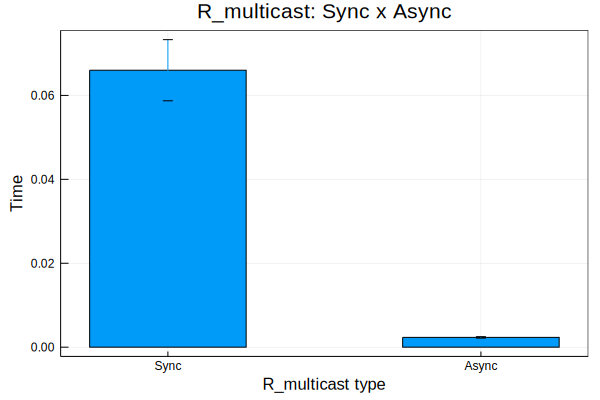

      From worker 5:	1 abc! from 1
      From worker 6:	1 abc! from 1


In [26]:
means = zeros((2,1))
zs = zeros((2,1))
means[1,1] = mean(sync_R_multi_times)
means[2,1] = mean(async_R_multi_times)
zs[1,1] = z*std(sync_R_multi_times)/length(sync_R_multi_times)
zs[2,1] = z*std(async_R_multi_times)/length(async_R_multi_times)
names = ["Sync", "Async"]
title = "R_multicast: Sync x Async"
xlabel = "R_multicast type"
groupedbar(names, means, yerr = zs, framestyle = :box, title = title, ylabel = "Time", xlabel = xlabel, bar_width = 0.5, legend = false)

* Qual das duas versões (R-multicast assíncrono e assíncrono) teve o menor tempo de execução? Por quê?

**Resposta**: _O assíncrono, pois não necessita que os processos sejam finalizados em ordem, enquanto no R-multicast necessita de ser finalizados em ordem._

### Exercício 4: Análise de desempenho: B-multicast vs. R-multicast (3,0 pontos)

Para cada uma das comparações abaixo, qual dos algoritmos teve o menor tempo de execução? Por quê?

* B-multicast assíncrono vs. R-multicast assíncrono.
    

**Resposta**: _A quantidade de mensagem a ser enviadas/agendadas no modelo B-multicast é menor que no modelo R-multicast, por isso o modelo B-multicast_

      From worker 7:	1 abc! from 1
      From worker 2:	2 abc! from 1


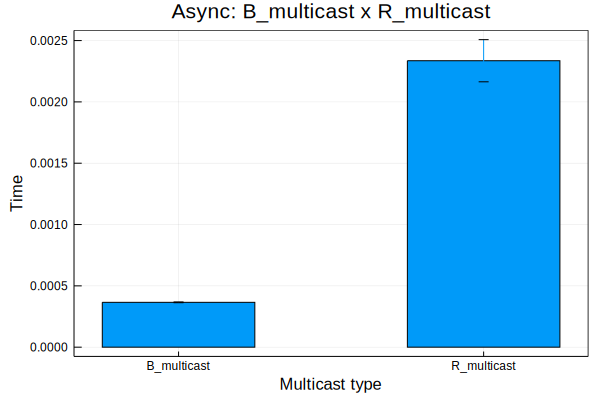

      From worker 4:	4 abc! from 1
      From worker 11:	1 abc! from 1
      From worker 11:	4 abc! from 1


In [27]:
means = zeros((2,1))
zs = zeros((2,1))
means[1,1] = mean(async_B_multi_times)
means[2,1] = mean(async_R_multi_times)
zs[1,1] = z*std(async_B_multi_times)/length(async_B_multi_times)
zs[2,1] = z*std(async_R_multi_times)/length(async_R_multi_times)
names = ["B_multicast", "R_multicast"]
title = "Async: B_multicast x R_multicast"
xlabel = "Multicast type"
groupedbar(names, means, yerr = zs, framestyle = :box, title = title, ylabel = "Time", xlabel = xlabel, bar_width = 0.5, legend = false)

* B-multicast síncrono vs. R-multicast síncrono.


**Resposta**: _A quantidade de mensagem a ser enviadas/agendadas no modelo B-multicast é menor que no modelo R-multicast, por isso o modelo B-multicast_

      From worker 11:	4 abc! from 1
      From worker 11:	11 abc! from 1
      From worker 11:	11 abc! from 1


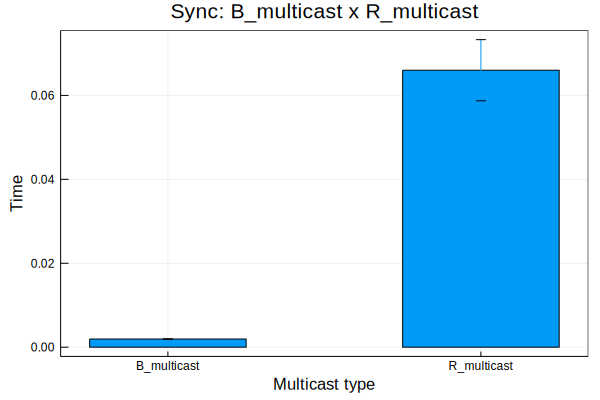

      From worker 11:	4 abc! from 1
      From worker 11:	4 abc! from 1
      From worker 11:	4 abc! from 1
      From worker 11:	4 abc! from 1
      From worker 11:	2 abc! from 1
      From worker 11:	2 abc! from 1
      From worker 11:	6 abc! from 1
      From worker 11:	11 abc! from 1
      From worker 11:	2 abc! from 1
      From worker 11:	11 abc! from 1
      From worker 11:	2 abc! from 1
      From worker 11:	2 abc! from 1
      From worker 11:	2 abc! from 1
      From worker 11:	3 abc! from 1
      From worker 11:	3 abc! from 1
      From worker 11:	9 abc! from 1
      From worker 9:	1 abc! from 1
      From worker 9:	7 abc! from 1
      From worker 9:	7 abc! from 1
      From worker 9:	7 abc! from 1
      From worker 9:	6 abc! from 1
      From worker 9:	7 abc! from 1
      From worker 9:	10 abc! from 1
      From worker 9:	8 abc! from 1
      From worker 9:	7 abc! from 1
      From worker 9:	7 abc! from 1
      From worker 10:	1 abc! from 1
      From worker 10:	11 abc! from 

      From worker 7:	3 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	3 abc! from 1
      From worker 2:	5 abc! from 1
      From worker 2:	6 abc! from 1
      From worker 2:	7 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	7 abc! from 1
      From worker 2:	2 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	5 abc! from 1
      From worker 2:	3 abc! from 1
      From worker 2:	6 abc! from 1
      From worker 2:	7 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	2 abc! from 1
      From worker 2:	7 abc! from 1
      From worker 2:	3 abc! from 1
      From worker 2:	5 abc! from 1
      From worker 2:	2 abc! from 1
      From worker 2:	3 abc! from 1
      From worker 2:	5 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	2 abc! from 1
      From worker 2:	5 abc! from 1
      From worker 2:	4 abc! from 1
      From worker 2:	7 abc! from 1
      From worker 2:	3 abc! from 1
      From worker 2:

      From worker 9:	6 abc! from 1
      From worker 9:	6 abc! from 1
      From worker 9:	3 abc! from 1
      From worker 9:	3 abc! from 1
      From worker 9:	3 abc! from 1
      From worker 9:	3 abc! from 1
      From worker 9:	3 abc! from 1
      From worker 9:	3 abc! from 1
      From worker 9:	2 abc! from 1
      From worker 9:	2 abc! from 1
      From worker 9:	5 abc! from 1
      From worker 9:	2 abc! from 1
      From worker 9:	2 abc! from 1
      From worker 9:	2 abc! from 1
      From worker 9:	2 abc! from 1
      From worker 9:	5 abc! from 1
      From worker 9:	5 abc! from 1
      From worker 9:	5 abc! from 1
      From worker 9:	5 abc! from 1
      From worker 9:	5 abc! from 1
      From worker 9:	5 abc! from 1
      From worker 9:	11 abc! from 1
      From worker 9:	9 abc! from 1
      From worker 9:	2 abc! from 1
      From worker 9:	11 abc! from 1
      From worker 9:	2 abc! from 1
      From worker 9:	9 abc! from 1
      From worker 9:	10 abc! from 1
      From worker

      From worker 3:	6 abc! from 1
      From worker 3:	6 abc! from 1
      From worker 3:	6 abc! from 1
      From worker 3:	6 abc! from 1
      From worker 3:	6 abc! from 1
      From worker 3:	6 abc! from 1
      From worker 3:	6 abc! from 1
      From worker 3:	9 abc! from 1
      From worker 3:	9 abc! from 1
      From worker 3:	9 abc! from 1
      From worker 3:	9 abc! from 1
      From worker 3:	9 abc! from 1
      From worker 3:	9 abc! from 1
      From worker 3:	9 abc! from 1
      From worker 3:	9 abc! from 1
      From worker 3:	9 abc! from 1
      From worker 3:	9 abc! from 1
      From worker 3:	10 abc! from 1
      From worker 3:	10 abc! from 1
      From worker 3:	10 abc! from 1
      From worker 3:	10 abc! from 1
      From worker 3:	10 abc! from 1
      From worker 3:	10 abc! from 1
      From worker 3:	10 abc! from 1
      From worker 3:	10 abc! from 1
      From worker 3:	10 abc! from 1
      From worker 3:	10 abc! from 1
      From worker 3:	8 abc! from 1
      From

In [28]:
means = zeros((2,1))
zs = zeros((2,1))
means[1,1] = mean(sync_B_multi_times)
means[2,1] = mean(sync_R_multi_times)
zs[1,1] = z*std(sync_B_multi_times)/length(sync_B_multi_times)
zs[2,1] = z*std(sync_R_multi_times)/length(sync_R_multi_times)
names = ["B_multicast", "R_multicast"]
title = "Sync: B_multicast x R_multicast"
xlabel = "Multicast type"
groupedbar(names, means, yerr = zs, framestyle = :box, title = title, ylabel = "Time", xlabel = xlabel, bar_width = 0.5, legend = false)

## Entrega

As respostas deverão ser entregues na parte indicada desse arquivo reservada ao código fonte, no formato [IJulia Notebook](https://github.com/JuliaLang/IJulia.jl), que utiliza tecnologia [Jupyter](https://www.jupyter.org).

O programa deve ser implementado na linguagem de programação [**Julia** versão 1.x](https://julialang.org/downloads/). Seu trabalho será testado na [JuliaBox](https://juliabox.com). 

Baixe seu arquivo `.ipynb` e anexe-o ao Google Classroom. Não se esqueça de **testar seu arquivo `.ipynb` na JuliaBox** antes de enviá-lo.


### Forma 

O arquivo IJulia Notebook deverá ser entregue ao Professor **exclusivamente através do Google Classroom**.



A responsabilidade sobre a integridade do arquivo contendo trabalho é exclusivamente dos discentes. Serão ignorados os trabalhos cujos arquivos não conseguirem ser abertos pelo Professor.

### Prazos

O prazo de entrega está descrito no **Google Classroom**.


## Pontuação extra

O(a) discente que realizar mais tarefas, além do que foi especificado neste trabalho, o professor atribuirá de 0,5 a 1,0 ponto extra a depender da relevância da contribuição no programa. O critério será decidido pelo professor. 

O(a) discente deve indicar qual é a tarefa executada. Por exemplo, adição de funcionalidades, armazenamento de dados em arquivo, documentação de código, comentários em inglês sem erros ortográficos, etc.


**Plágio** A nota zero será atribuída caso haja qualquer tipo de cópia parcial ou integral assim como as devidas medidas legais. Leia a [cartilha sobre plágio](http://www.noticias.uff.br/arquivos/cartilha-sobre-plagio-academico.pdf).

## Disclaimer

Esse material foi elaborado pelo [Prof. André Lage Freitas](https://sites.google.com/a/ic.ufal.br/andrelage/) e está licenciado sob a licença _GNU General Public License v3.0_.